# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.

In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from scipy import signal


# Obrazki
if not os.path.exists("jet.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/jet.png --no-check-certificate
if not os.path.exists("kw.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/kw.png --no-check-certificate
if not os.path.exists("moon.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/moon.png --no-check-certificate
if not os.path.exists("lenaSzum.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaSzum.png --no-check-certificate
if not os.path.exists("lena.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lena.png --no-check-certificate
if not os.path.exists("plansza.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/plansza.png --no-check-certificate

1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

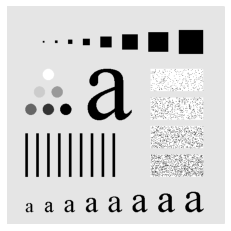

In [166]:
plansza = cv2.imread('plansza.png')
plansza = cv2.cvtColor(plansza, cv2.COLOR_BGR2GRAY)

plt.imshow(plansza)
plt.axis('off')
plt.gray()
plt.show()

In [123]:
def mean_filter(image, size, ax=None):
    kernel = np.ones((size, size))/(size**2)
   
    if ax is not None:
        ax.set_title(f'{size}x{size}')
        ax.imshow(cv2.filter2D(image, -1, kernel))
    else:
        return cv2.filter2D(image, -1, kernel)

In [124]:
def show_filtered(image, filtered):
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))

    for axis in ax: axis.axis('off')

    ax[0].set_title('obraz oryginalny')
    ax[1].set_title('po filtracji')
    ax[2].set_title('moduł z różnicy')

    ax[0].imshow(image, vmin=0, vmax=255)
    ax[1].imshow(filtered, vmin=0, vmax=255)
    ax[2].imshow(np.abs(image.astype('int') - filtered.astype('int')), vmin=0, vmax=255)

    plt.show()

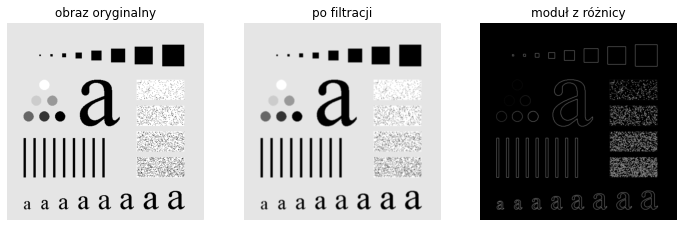

In [125]:
filtered_plansza = mean_filter(plansza, 3, None)
show_filtered(plansza, filtered_plansza)

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
Przeanalizuj wpływ rozmiaru maski na wynik. 

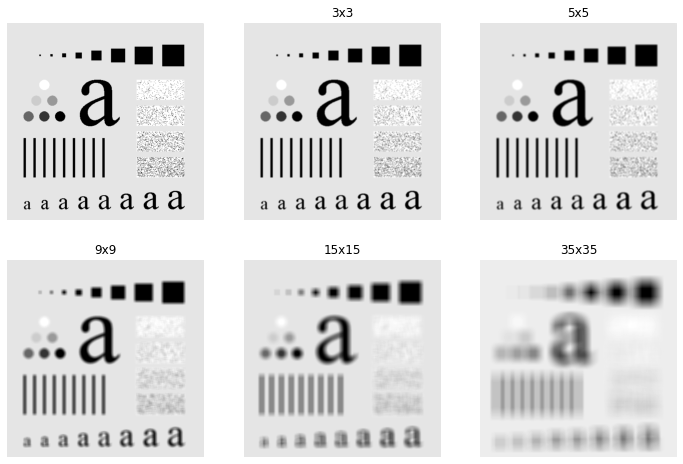

In [126]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for row in ax:
    for axis in row:
        axis.axis('off')
        
ax[0, 0].imshow(plansza)
mean_filter(plansza, 3, ax[0, 1])
mean_filter(plansza, 5, ax[0, 2])
mean_filter(plansza, 9, ax[1, 0])
mean_filter(plansza, 15, ax[1, 1])
mean_filter(plansza, 35, ax[1, 2])

plt.show()

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

In [130]:
lena = cv2.imread('lena.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

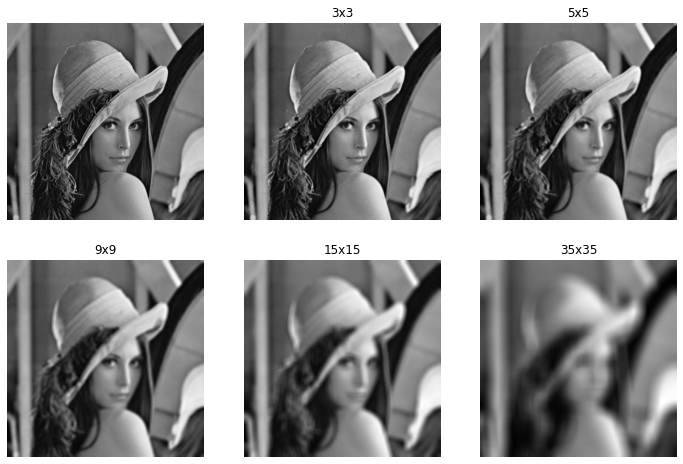

In [131]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for row in ax:
    for axis in row:
        axis.axis('off')
        
ax[0, 0].imshow(lena)
mean_filter(lena, 3, ax[0, 1])
mean_filter(lena, 5, ax[0, 2])
mean_filter(lena, 9, ax[1, 0])
mean_filter(lena, 15, ax[1, 1])
mean_filter(lena, 35, ax[1, 2])

plt.show()

7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

In [132]:
def mean_filter2(image):
    kernel = np.array([
            [1, 2, 1],
            [2, 4, 2],
            [1, 2, 1]
        ], dtype=float)
    kernel /= np.sum(kernel)
    return cv2.filter2D(image, -1, kernel)

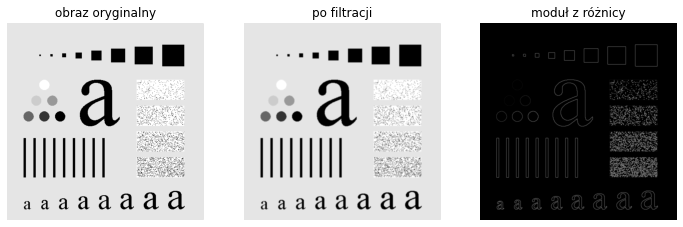

In [133]:
filtered_plansza = mean_filter2(plansza)
show_filtered(plansza, filtered_plansza)

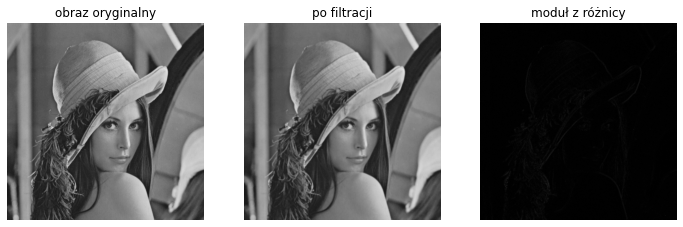

In [134]:
filtered_lena = mean_filter2(lena)
show_filtered(lena, filtered_lena)

8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


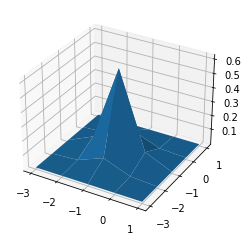

In [135]:
def fgaussian(size, sigma):
    m = n = size
    h, k = m//2, n//2
    x, y = np.mgrid[-h:h+1, -k:k+1]
    g = np.exp(-(x**2 + y**2)/(2*sigma**2))
    return g /g.sum() 
    
    
def mesh(fun, size):
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
    
    ax.plot_surface(X, Y, Z)
    
    plt.show()

mesh(fgaussian(5, 0.5), 5)

sigma=0.2


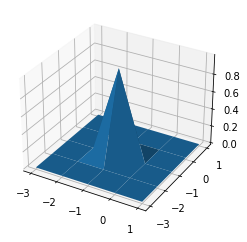

sigma=0.5


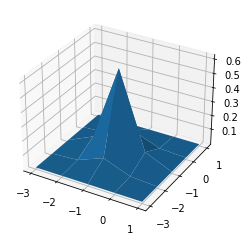

sigma=0.7


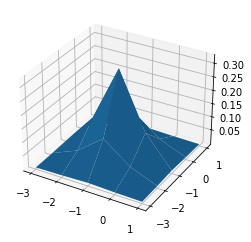

sigma=1000


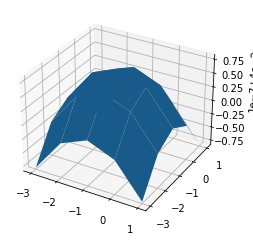

In [136]:
sigmas = [0.2, 0.5, 0.7, 1000]

for sigma in sigmas:
    print(f'{sigma=}')
    mesh(fgaussian(5, sigma), 5)

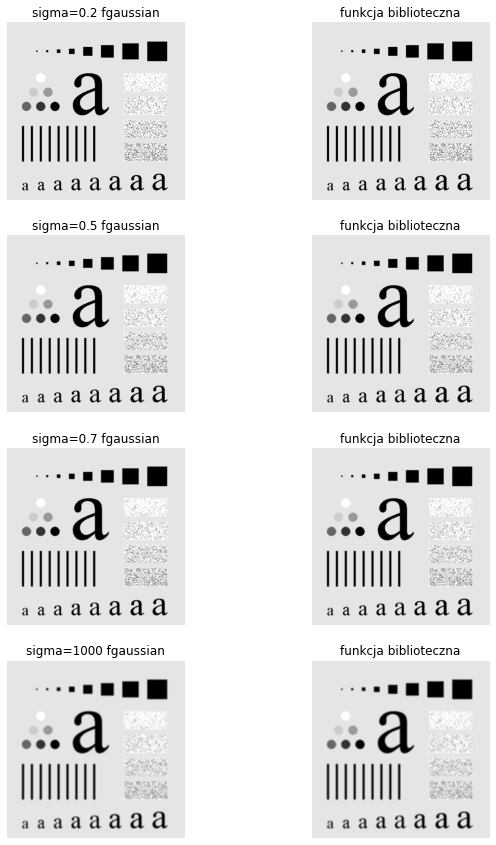

In [137]:
fig, ax = plt.subplots(len(sigmas), 2, figsize=(10, 15))

for axes in ax:
    for axis in axes:
        axis.axis('off')

for i, sigma in enumerate(sigmas):
    kernel = fgaussian(5, sigma)
    ax[i][0].set_title(f'{sigma=} fgaussian')
    ax[i][0].imshow(cv2.filter2D(plansza, -1, kernel))
    ax[i][1].set_title('funkcja biblioteczna')
    ax[i][1].imshow(cv2.GaussianBlur(plansza, (5, 5), sigma))

plt.show()

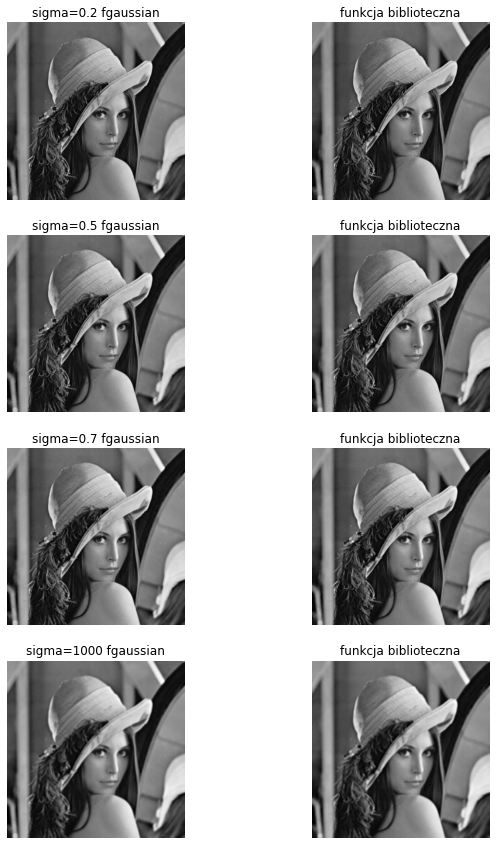

In [138]:
fig, ax = plt.subplots(len(sigmas), 2, figsize=(10, 15))

for axes in ax:
    for axis in axes:
        axis.axis('off')

for i, sigma in enumerate(sigmas):
    kernel = fgaussian(5, sigma)
    ax[i][0].set_title(f'{sigma=} fgaussian')
    ax[i][0].imshow(cv2.filter2D(lena, -1, kernel))
    ax[i][1].set_title('funkcja biblioteczna')
    ax[i][1].imshow(cv2.GaussianBlur(lena, (5, 5), sigma))

plt.show()

### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


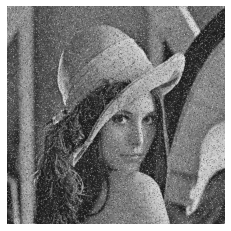

In [139]:
lena_szum = cv2.imread('lenaSzum.png')
lena_szum = cv2.cvtColor(lena_szum, cv2.COLOR_BGR2GRAY)

plt.imshow(lena_szum)
plt.axis('off')
plt.show()

--filtr uśredniający--


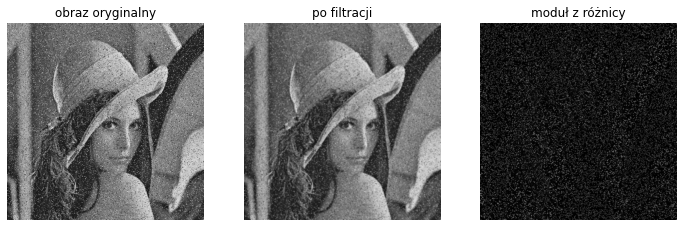

In [140]:
print('--filtr uśredniający--')
filtered = mean_filter(lena_szum, 3, None)
show_filtered(lena_szum, filtered)

--filtr medianowy--


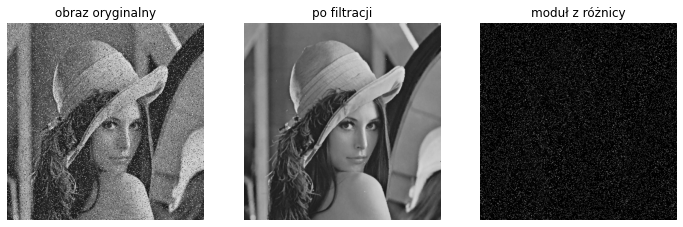

In [141]:
print('--filtr medianowy--')
filtered = cv2.medianBlur(lena_szum, 3)
show_filtered(lena_szum, filtered)

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

--filtr uśredniający--


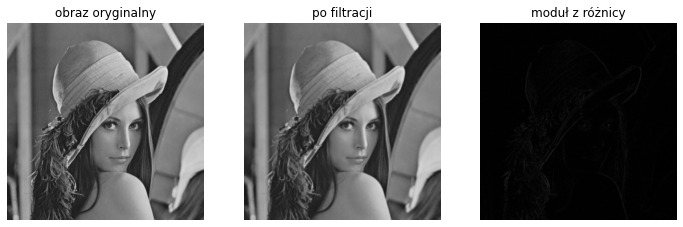

In [76]:
print('--filtr uśredniający--')
filtered = mean_filter(lena, 3, None)
show_filtered(lena, filtered)

--filtr medianowy--


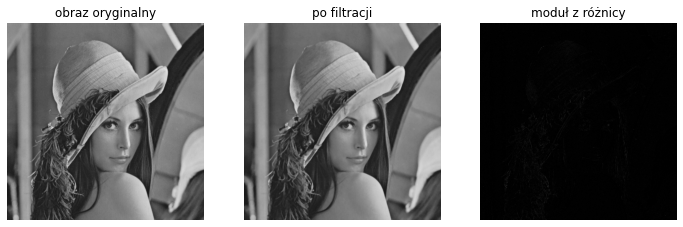

In [142]:
print('--filtr medianowy--')
filtered = cv2.medianBlur(lena, 3)
show_filtered(lena, filtered)

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tę samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

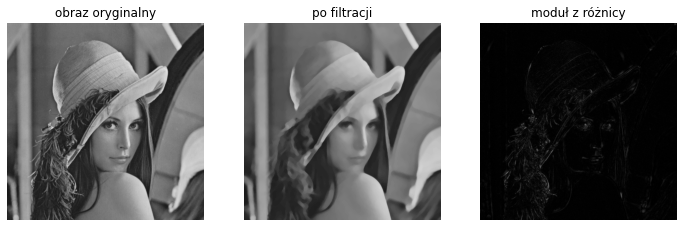

In [143]:
filtered = lena
for _ in range(10):
    filtered = cv2.medianBlur(filtered, 5)

show_filtered(lena, filtered)

## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach. 

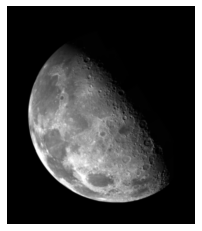

In [144]:
moon = cv2.imread('moon.png')
moon = cv2.cvtColor(moon, cv2.COLOR_BGR2GRAY)

plt.imshow(moon)
plt.axis('off')
plt.show()

In [174]:
kernel = np.array([
    [0,  1,  0],
    [1, -4,  1],
    [0,  1,  0]
], dtype=float)

kernel /= 9

In [177]:
def show_convolution(image, filtered):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    for axis in ax: axis.axis('off')

    ax[0].set_title('obraz oryginalny')
    ax[1].set_title('konwolucja (+128)')
    ax[2].set_title('konwolucja (abs)')

    ax[0].imshow(image)
    ax[1].imshow(filtered+128)
    ax[2].imshow(np.abs(filtered))

    plt.show()

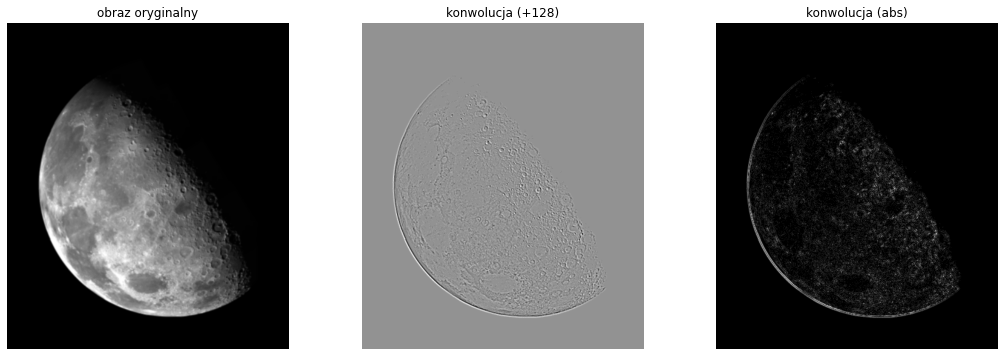

In [178]:
filtered = cv2.filter2D(moon.astype('int16'), -1, kernel)
show_convolution(moon, filtered)

7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



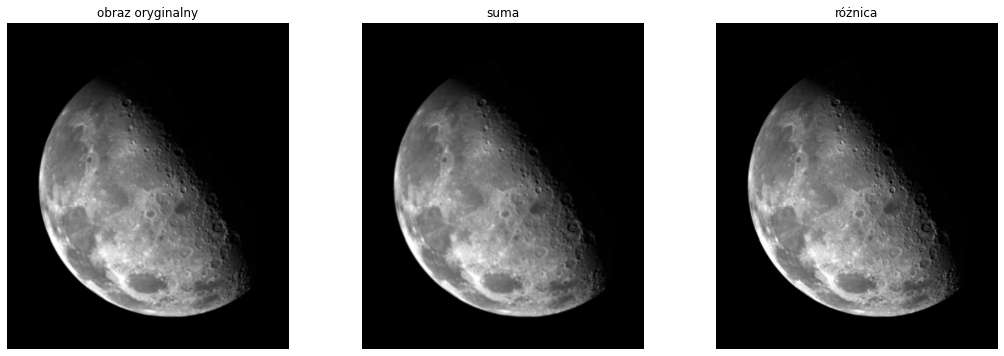

In [165]:
filtered = cv2.filter2D(moon.astype('int16'), -1, kernel)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
for axis in ax: axis.axis('off')
    
ax[0].set_title('obraz oryginalny')
ax[1].set_title('suma')
ax[2].set_title('różnica')

    
ax[0].imshow(moon)
ax[1].imshow(moon.astype('int16') + filtered)
ax[2].imshow(np.abs(moon.astype('int16') - filtered))

plt.show()

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

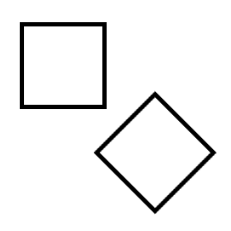

In [169]:
kw = cv2.imread('kw.png')
kw = cv2.cvtColor(kw, cv2.COLOR_BGR2GRAY)

plt.imshow(kw)
plt.axis('off')
plt.show()

In [203]:
kernel_r1 = np.array([
    [0, 0, 0],
    [-1, 0, 0],
    [0, 1, 0]
])/9

kernel_r2 = np.array([
    [0, 0, 0],
    [0, 0, -1],
    [0, 1, 0]
])/9

R1


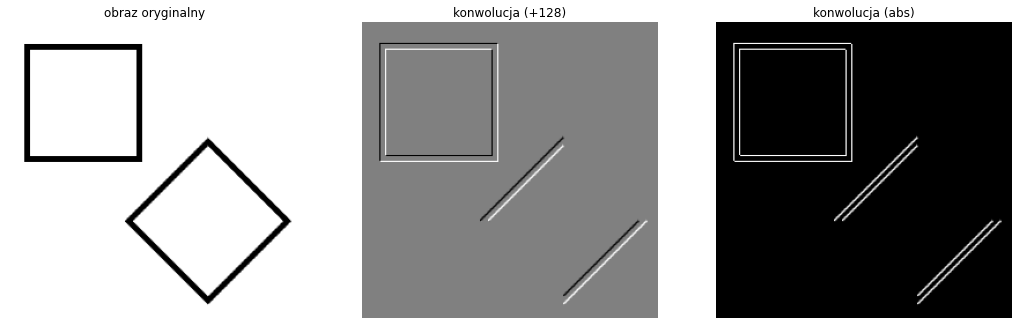

In [204]:
print('R1')
filtered = cv2.filter2D(kw.astype('int16'), -1, kernel_r1)
show_convolution(kw, filtered)

R2


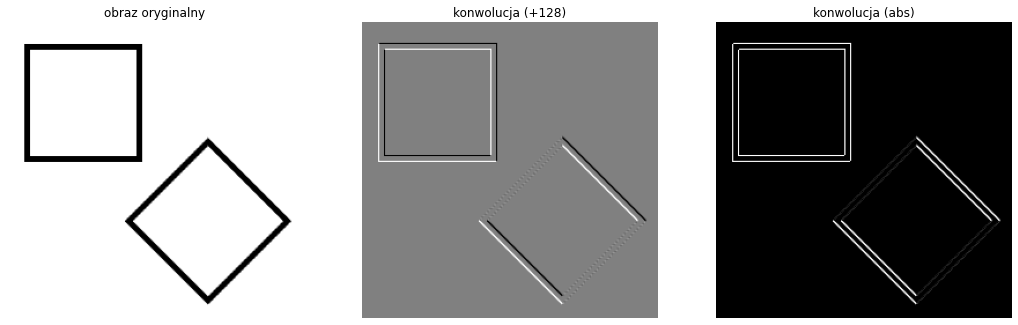

In [205]:
print('R2')
filtered = cv2.filter2D(kw.astype('int16'), -1, kernel_r2)
show_convolution(kw, filtered)

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

In [206]:
kernel_p1 = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])/9

kernel_p2 = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])/9

P1


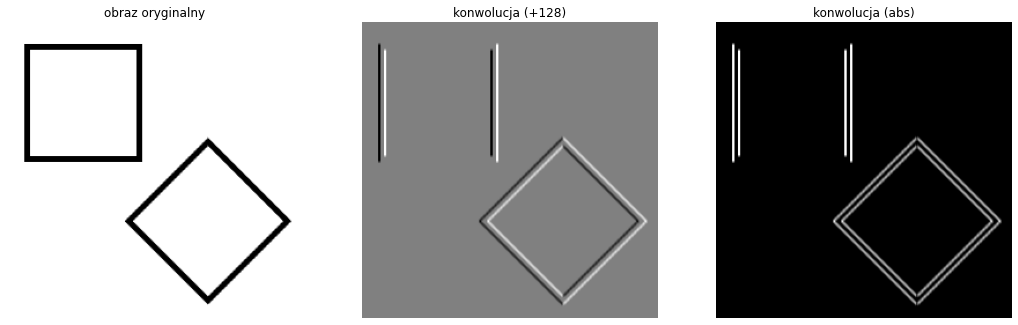

In [207]:
print('P1')
filtered = cv2.filter2D(kw.astype('int16'), -1, kernel_p1)
show_convolution(kw, filtered)

P2


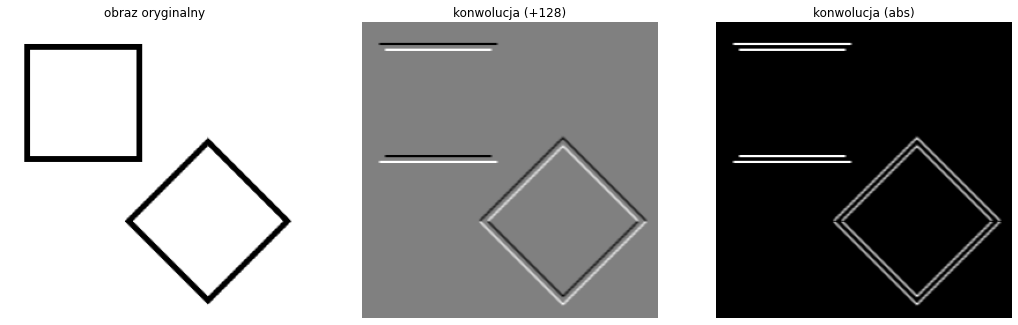

In [208]:
print('P2')
filtered = cv2.filter2D(kw.astype('int16'), -1, kernel_p2)
show_convolution(kw, filtered)

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

In [210]:
kernel_s1 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])/9

kernel_s2 = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])/9

S1


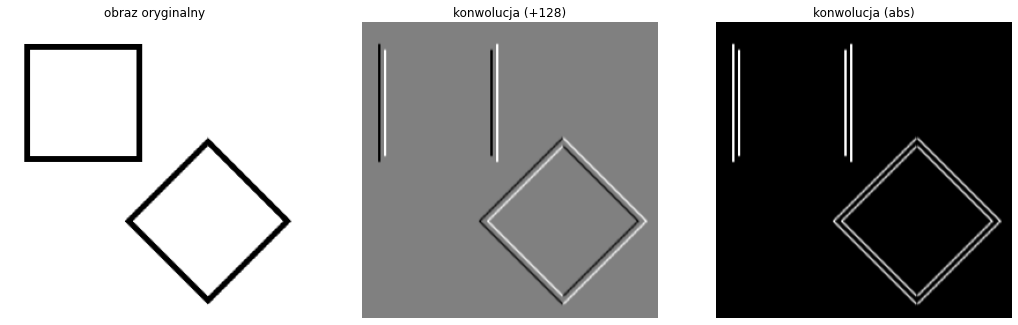

In [213]:
print('S1')
filtered = cv2.filter2D(kw.astype('int16'), -1, kernel_s1)
show_convolution(kw, filtered)

S2


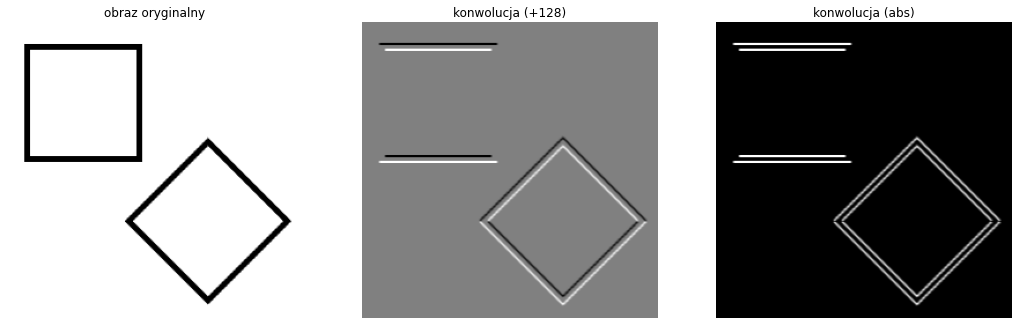

In [214]:
print('S2')
filtered = cv2.filter2D(kw.astype('int16'), -1, kernel_s2)
show_convolution(kw, filtered)

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



filtr kombinowany - pierwiastek sumy kwadratów


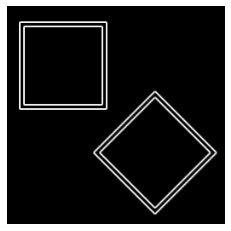

In [250]:
print('filtr kombinowany - pierwiastek sumy kwadratów')

filtered_s1 = cv2.filter2D(kw.astype('int16'), -1, kernel_s1)
filtered_s2 = cv2.filter2D(kw.astype('int16'), -1, kernel_s2)

filtered = np.sqrt(filtered_s1**2 + filtered_s2**2)
plt.imshow(filtered)
plt.axis('off')
plt.show()

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

filtr kombinowany - suma modułów


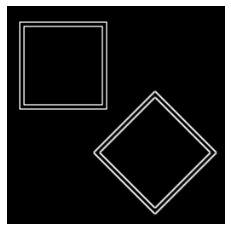

In [251]:
print('filtr kombinowany - suma modułów')

filtered = np.abs(filtered_s1) + np.abs(filtered_s2)
plt.imshow(filtered)
plt.axis('off')
plt.show()

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

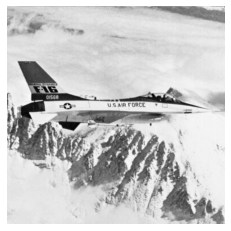

In [247]:
jet = cv2.imread('jet.png')
jet = cv2.cvtColor(jet, cv2.COLOR_BGR2GRAY)

plt.imshow(jet)
plt.axis('off')
plt.show()

filtr kombinowany - pierwiastek sumy kwadratów


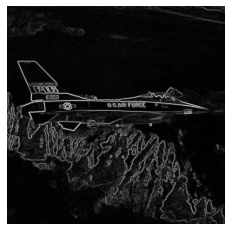

In [252]:
print('filtr kombinowany - pierwiastek sumy kwadratów')

filtered_s1 = cv2.filter2D(jet.astype('int16'), -1, kernel_s1)
filtered_s2 = cv2.filter2D(jet.astype('int16'), -1, kernel_s2)

filtered = np.sqrt(filtered_s1**2 + filtered_s2**2)
plt.imshow(filtered)
plt.axis('off')
plt.show()

filtr kombinowany - suma modułów


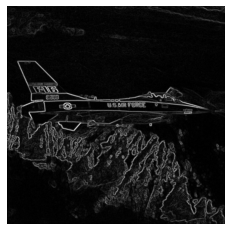

In [253]:
print('filtr kombinowany - suma modułów')

filtered = np.abs(filtered_s1) + np.abs(filtered_s2)
plt.imshow(filtered)
plt.axis('off')
plt.show()